<a href="https://colab.research.google.com/github/JinLeeGG/Survival-Prediction-Model-for-AML-using-Gene-Expression-Data-from-TCGA/blob/main/Survival_Analysis_of_EGR1_Expression_in_Patients_with_Acute_Myeloid_Leukemia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**
- This project investigates the relationship between EGR1 (Early Growth Response 1) gene expression levels and survival outcomes in Acute Myeloid Leukemia (AML) patients using data from The Cancer Genome Atlas (TCGA-LAML).

## **Hypothesis:**
 * AML patients with different EGR1 expression levels may show correlative differences in survival outcomes.

## **Dataset**
  - [Preprocessed Data from data analysis process](https://colab.research.google.com/drive/1abZxKxT8qc4N79ODnPbJiGcYgTD4l4ON#scrollTo=tYSwYMqNyyux&uniqifier=1)

## **Key Findings:**
  - The Kaplan-Meier survival analysis indicates a significant association between EGR1 expression and patient survival. Patients with high EGR1 expression (top 20%) demonstrated a markedly better survival probability over time compared to patients with low EGR1 expression (bottom 20%).



In [16]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Reading merged dataframe**
  - bcr_patient_barcode
    - each patients' unique id
  - Status
    - 1 as Deceased, 0 as alive
  - Obervation Period :
    - Total Observation Period
  - 20319 of RNA expression data

In [17]:
merged_df = pd.read_csv('/content/drive/MyDrive/Acute Myeloid Leukemia (TCGA, PanCancer Atlas)/Processed_Data/merged_df.csv')
merged_df

,bcr_patient_barcode,Status,Observation Period,A1BG-AS|503538,A1BG|1,A1CF|29974,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,...,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-AB-2803,1,792.0,792.14,1139.18,0.00,194.50,24.36,982.14,24.98,...,555.04,67.00,795.76,3093.76,1114.18,9613.40,5332.46,2452.22,33.00,7.78
1,TCGA-AB-2805,1,576.0,429.64,403.44,0.00,227.10,33.66,193.26,5.00,...,1360.22,41.88,912.38,5481.82,3834.64,18642.30,12197.30,3494.92,19.22,26.34
2,TCGA-AB-2806,1,944.0,891.18,1004.70,0.00,179.84,45.82,129.92,55.72,...,1623.44,231.76,2251.04,6184.50,1696.52,18565.60,12208.00,6213.06,332.12,1.00
3,TCGA-AB-2807,1,180.0,1095.44,1121.68,1.00,111.06,11.08,884.28,272.40,...,1575.48,283.66,1559.34,2978.60,1990.44,7733.44,9364.42,2986.18,51.88,22.28
4,TCGA-AB-2808,0,2861.0,570.74,531.26,0.00,123.08,21.64,757.42,537.62,...,2168.70,106.86,1111.84,3922.22,2723.36,10197.40,8040.82,3697.18,47.70,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,TCGA-AB-3007,0,1581.0,1561.60,1503.12,0.00,321.06,18.34,201.94,776.14,...,1480.26,288.32,1284.20,6217.06,1926.22,6308.06,12576.40,3929.76,30.68,24.38
175,TCGA-AB-3008,1,822.0,1052.62,824.12,0.00,113.20,73.24,2400.86,520.90,...,3793.34,349.88,1349.90,5590.80,2401.34,16703.00,12810.40,3548.82,155.78,0.00
176,TCGA-AB-3009,1,576.0,489.64,514.78,0.00,506.60,229.24,648.56,38.02,...,1133.66,212.18,1078.90,5370.92,2515.52,23951.40,12152.40,3942.60,1493.54,1.00
177,TCGA-AB-3011,0,1885.0,899.50,736.42,0.00,93.70,20.36,162.48,60.20,...,1464.88,87.22,699.92,5071.14,1535.64,9142.90,9567.60,3060.22,47.78,1.04


In [18]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Columns: 20322 entries, bcr_patient_barcode to tAKR|389932
dtypes: float64(20320), int64(1), object(1)
memory usage: 27.8+ MB


In [19]:
# Obervation Period contains 12 NaN
merged_df['Observation Period'].describe()

,Observation Period
count,167.000000
mean,568.850299
std,587.443211
min,0.000000
25%,153.000000
50%,365.000000
75%,792.000000
max,2861.000000


In [23]:
# Since we do not know exact days that patient lived after dignostic, remove patient with NaN
# If Patient have lived 0 days, it shows 0.0
merged_df.dropna(subset=['Observation Period'], inplace=True)
merged_df

,bcr_patient_barcode,Status,Observation Period,A1BG-AS|503538,A1BG|1,A1CF|29974,A2LD1|87769,A2ML1|144568,A2M|2,A4GALT|53947,...,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009,psiTPTE22|387590,tAKR|389932
0,TCGA-AB-2803,1,792.0,792.14,1139.18,0.00,194.50,24.36,982.14,24.98,...,555.04,67.00,795.76,3093.76,1114.18,9613.40,5332.46,2452.22,33.00,7.78
1,TCGA-AB-2805,1,576.0,429.64,403.44,0.00,227.10,33.66,193.26,5.00,...,1360.22,41.88,912.38,5481.82,3834.64,18642.30,12197.30,3494.92,19.22,26.34
2,TCGA-AB-2806,1,944.0,891.18,1004.70,0.00,179.84,45.82,129.92,55.72,...,1623.44,231.76,2251.04,6184.50,1696.52,18565.60,12208.00,6213.06,332.12,1.00
3,TCGA-AB-2807,1,180.0,1095.44,1121.68,1.00,111.06,11.08,884.28,272.40,...,1575.48,283.66,1559.34,2978.60,1990.44,7733.44,9364.42,2986.18,51.88,22.28
4,TCGA-AB-2808,0,2861.0,570.74,531.26,0.00,123.08,21.64,757.42,537.62,...,2168.70,106.86,1111.84,3922.22,2723.36,10197.40,8040.82,3697.18,47.70,5.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,TCGA-AB-3007,0,1581.0,1561.60,1503.12,0.00,321.06,18.34,201.94,776.14,...,1480.26,288.32,1284.20,6217.06,1926.22,6308.06,12576.40,3929.76,30.68,24.38
175,TCGA-AB-3008,1,822.0,1052.62,824.12,0.00,113.20,73.24,2400.86,520.90,...,3793.34,349.88,1349.90,5590.80,2401.34,16703.00,12810.40,3548.82,155.78,0.00
176,TCGA-AB-3009,1,576.0,489.64,514.78,0.00,506.60,229.24,648.56,38.02,...,1133.66,212.18,1078.90,5370.92,2515.52,23951.40,12152.40,3942.60,1493.54,1.00
177,TCGA-AB-3011,0,1885.0,899.50,736.42,0.00,93.70,20.36,162.48,60.20,...,1464.88,87.22,699.92,5071.14,1535.64,9142.90,9567.60,3060.22,47.78,1.04


# **Kaplan-Meier analysis**

In [24]:
pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 10.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=08f378c4891cc52a7db90ab63d2f032f66d13360bd485c6dccd5f29a50bd41e5
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


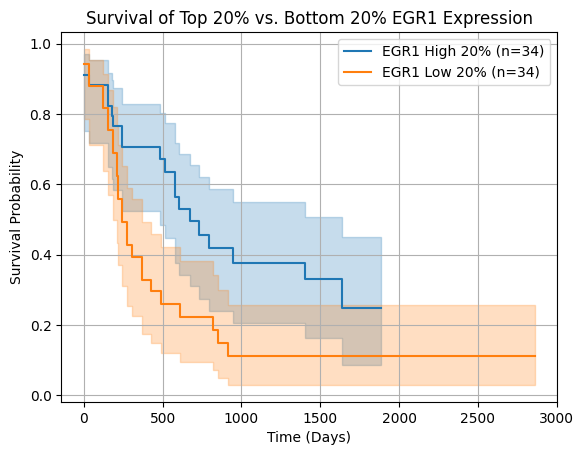


--- Log-Rank Test Results ---


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           6.05 0.01      6.16

In [27]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
import matplotlib.pyplot as plt

# 1. Define the expression thresholds for the top and bottom 20%
low_quantile = merged_df['EGR1|1958'].quantile(0.2)
high_quantile = merged_df['EGR1|1958'].quantile(0.8)

# 2. Create filters for the two groups
low_20_filter = merged_df['EGR1|1958'] <= low_quantile
high_20_filter = merged_df['EGR1|1958'] >= high_quantile

# 3. Perform Kaplan-Meier survival analysis and visualization 📊
kmf = KaplanMeierFitter()
ax = plt.subplot(111)

# Plot for the Highest 20% expression group
kmf.fit(durations=merged_df[high_20_filter]['Observation Period'],
        event_observed=merged_df[high_20_filter]['Status'],
        label=f'EGR1 High 20% (n={sum(high_20_filter)})')
kmf.plot_survival_function(ax=ax)

# Plot for the Lowest 20% expression group
kmf.fit(durations=merged_df[low_20_filter]['Observation Period'],
        event_observed=merged_df[low_20_filter]['Status'],
        label=f'EGR1 Low 20% (n={sum(low_20_filter)})')
kmf.plot_survival_function(ax=ax)

# Set graph titles and labels
ax.set_title('Survival of Top 20% vs. Bottom 20% EGR1 Expression')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Survival Probability')
ax.grid(True)
plt.show()

# 4. Perform the log-rank test for statistical significance 📝
results = logrank_test(
    durations_A=merged_df[high_20_filter]['Observation Period'],
    durations_B=merged_df[low_20_filter]['Observation Period'],
    event_observed_A=merged_df[high_20_filter]['Status'],
    event_observed_B=merged_df[low_20_filter]['Status']
)

print("\n--- Log-Rank Test Results ---")
results.print_summary()